In [2]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from preamble import *
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Оценка и улучшение качества модели

Обсудив основы машинного обучения с учителем и без учителя, теперь
мы еще сильнее погрузимся в вопросы, связанные с оценкой моделей и
выбором параметров.
Мы сосредоточимся на методах машинного обучения с учителем,
регрессии и классификации, поскольку оценка качества и выбор моделей
машинного обучения без учителя часто представляют собой очень
субъективную процедуру.
Вплоть до настоящего момента для оценки качества модели мы
разбивали наши данные на обучающий и тестовый наборы с помощью
функции train_test_split, строили модель на обучающей выборке,
вызвав метод fit, и оценивали ее качество на тестовом наборе, используя
метод score, который для классификации вычисляет долю правильно
классифицированных примеров. Вот пример вышеописанной
последовательности действий:

In [5]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# создаем синтетический набор данных
X, y = make_blobs(random_state=0)
# разобъем данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# создаем экземпляр модели и подгоняем его на обучающем наборе
logreg = LogisticRegression().fit(X_train, y_train)
# оцениваем качество модели на тестовом наборе
print("Правильность на тестовом наборе: {:.2f}".format(logreg.score(X_test, y_test)))

Правильность на тестовом наборе: 0.88


In [6]:
X.shape

(100, 2)

### Cross-Validation

Вспомним, что причина, по которой мы разбиваем наши данные на
обучающий и тестовый наборы, заключается в том, что нас интересует,
насколько хорошо наша модель обобщает результат на новые, ранее
неизвестные данные. Нас интересует не качество подгонки модели к
обучающим данным, а правильность ее прогнозов для данных, не
Далее остановимся на двух аспектах этой оценки.
Сначала мы расскажем о перекрестной проверке, более надежном способе
оценки обобщающей способности, а также рассмотрим методы оценки
обобщающей способности для классификации и регрессии, которые
выходят за рамки традиционных показателей правильности и R2,
предусмотренных методом fit.

### Перекрестная проверка

Перекрестная проверка представляет собой статистический метод оценки
обобщающей способности, который является более устойчивым и
основательным, чем разбиение данных на обучающий и тестовый наборы.
В перекрестной проверке данные разбиваются несколько раз и строится
несколько моделей. Наиболее часто используемый вариант перекрестной
проверки – k-блочная кросс-проверка (k-fold cross-validation), в которой
k – это задаваемое пользователем число, как правило, 5 или 10. При
выполнении пятиблочной перекрестной проверки данные сначала
разбиваются на пять частей (примерно) одинакового размера,
называемых блоками (folds) складками. Затем строится
последовательность моделей. Первая модель обучается, используя блок
1 в качестве тестового набора, а остальные блоки (2-5) выполняют роль
обучающего набора. Модель строится на основе данных, расположенных
в блоках 2-5, а затем на данных блока 1 оценивается ее правильность.
Затем происходит обучение второй модели, на этот раз в качестве
тестового набора используется блок 2, а данные в блоках 1, 3, 4, и 5
служат обучающим набором. Этот процесс повторяется для блоков 3, 4 и
5, выполняющих роль тестовых наборов. Для каждого из этих пяти
разбиений (splits) данных на обучающий и тестовый наборы мы
вычисляем правильность. В итоге мы зафиксировали пять значений
правильности. Процесс показан на рис.:

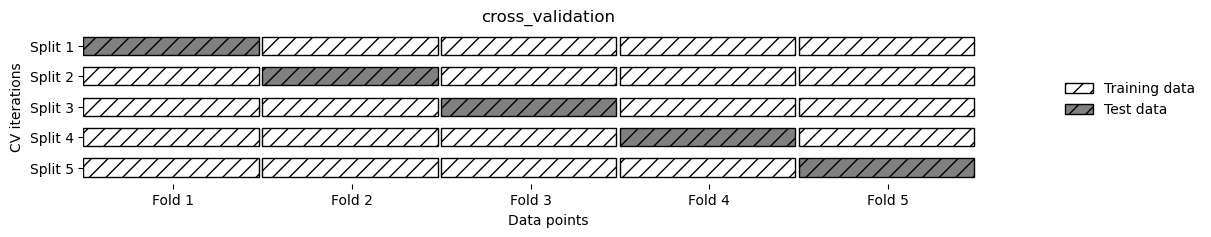

In [7]:
import mglearn
mglearn.plots.plot_cross_validation()

Как правило, первая пятая часть данных формирует первый блок,
вторая пятая часть данных формирует второй блок и так далее.

#### Перекрестная проверка в scikit-learn

В scikit-learn перекрестная проверка реализована с помощью функции
cross_val_score модуля model_selection. Аргументами функции
cross_val_score являются оцениваемая модель, обучающие данные и
фактические метки. Давайте оценим качество модели
LogisticRegression на наборе данных iris:

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.96666667 1.         0.93333333 0.96666667 1.        ]


По умолчанию cross_val_score выполняет трехблочную
перекрестную проверку, возвращая три значения правильности. Мы
можем изменить количество блоков, задав другое значение параметра cv:

In [15]:
scores = cross_val_score(logreg, iris.data, iris.target)
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.96666667 1.         0.93333333 0.96666667 1.        ]


Наиболее распространенный способ подытожить правильность,
вычисленную в ходе перекрестной проверки, – это вычисление среднего
значения:

In [20]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.97


Используя усредненное значение правильности для перекрестной
проверки, мы можем сделать вывод, что средняя правильность модели
составит примерно 96%. Взглянув на все пять значений правильности,
полученных в ходе пятиблочной перекрестной проверки, можно еще
сделать вывод о том, что существует относительно высокий разброс
значений правильности, вычисленных для блоков, от 100% до 90%.
Подобный результат может означать, что модель сильно зависит от
конкретных блоков, использованных для обучения, а также это может
быть обусловлено небольшим размером набора данных.

### Преимущетва перекрестной проверки

По сравнению с однократным разбиением данных на обучающий и
тестовый наборы использование перекрестной проверки имеет несколько
преимуществ. Во-первых, вспомним что train_test_split выполняет
случайное разбиение данных. Представьте себе, что при выполнении
случайного разбиения данных нам «повезло», и все трудно
классифицируемые примеры в конечном итоге попали в обучающий
набор. В этом случае в тестовый набор попадут только «легкие» примеры,
и правильность на тестовом наборе будет неправдоподобно высокой. И,
наоборот, если нам «не повезло», все трудно классифицируемые примеры
попадают в тестовый набор и поэтому мы получаем неправдоподобно
низкую правильность. Однако при использовании перекрестной
проверки на каждой итерации в тестовый набор, использующийся для
проверки модели, попадают разные примеры. Таким образом, модель
должна хорошо обобщать все примеры в наборе данных, чтобы все
значения правильности (или их среднее) были высокими.
Кроме того, наличие нескольких разбиений дает определенную
информацию о том, насколько наша модель чувствительна к выбору
обучающего набора данных. Для набора данных iris мы увидели разброс
значений правильности от 90% до 100%. Это довольно широкий диапазон
значений и он позволяет нам судить о том, как модель будет работать в
худшем и лучшем случае, когда мы применим ее к новым данным.

Еще одно преимущество перекрестной проверки по сравнению с
однократным разбиением данных заключается в том, что мы используем
наши данные более эффективно. Применяя train_test_split, мы обычно
используем 75% данных для обучения и 25% данных для оценки
качества. Применяя пятиблочную перекрестную проверку, на каждой
итерации для подгонки модели мы можем использовать 4/5 данных
(80%). При использовании 10-блочной перекрестной проверки мы можем
использовать для подгонки модели 9/10 данных (90%). Больший объем
данных, как правило, приводит к построению более точных моделей.
Основной недостаток перекрестной проверки – увеличение стоимости
вычислений. Поскольку теперь мы обучаем k моделей вместо одной
модели, перекрестная проверка будет выполняться примерно в k раз
медленнее, чем однократное разбиение данных.

In [17]:
from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
display(res)

{'fit_time': array([0.01100254, 0.01900029, 0.0130024 , 0.01900125, 0.01299763]),
 'score_time': array([0.00099325, 0.0010004 , 0.        , 0.        , 0.00100017]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [18]:
res

{'fit_time': array([0.01100254, 0.01900029, 0.0130024 , 0.01900125, 0.01299763]),
 'score_time': array([0.00099325, 0.0010004 , 0.        , 0.        , 0.00100017]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [19]:
import pandas as pd
res_df = pd.DataFrame(res)
display(res_df)
print("Среднее время и проверка:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.011003,0.000993,0.966667,0.966667
1,0.019000,0.001000,1.000000,0.966667
2,0.013002,0.000000,0.933333,0.983333
3,0.019001,0.000000,0.966667,0.983333
4,0.012998,0.001000,1.000000,0.975000


Среднее время и проверка:
 fit_time       0.015001
score_time     0.000599
test_score     0.973333
train_score    0.975000
dtype: float64


### Стратифицированная k- блочная перекретная проверка и другие стратегии

Описанное ранее разбиение данных на k блоков,
начиная с первого k-го блока, не всегда является хорошей идеей. Для
примера давайте посмотрим на набор данных iris:

In [20]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Метки ирисов:\n{}".format(iris.target))

Метки ирисов:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Как видно, первая треть данных – это класс 0, вторая треть – класс 1,
а последняя треть – класс 2. Представьте, что сделает с этим набором
данных трехблочная перекрестная проверка. Первый блок будет состоять
из примеров, относящихся только к классу 0, поэтому при первом
разбиении данных тестовый набор станет полностью классом 0, а
обучающий набор будет содержать примеры, относящиеся только к
классам 1 и 2. Поскольку классы в обучающем и тестовом наборах будут
разными во всех трех разбиениях, правильность трехблочной
перекрестной проверки для этого набора данных будет равна нулю.
Данный сценарий не является оптимальным, поскольку для набора
данных iris мы можем получить правильность существенно выше 0%.

Поскольку обычная k-блочная стратегия в данном случае терпит
неудачу, вместо нее библиотека scikit-learn предлагает использовать
для классификации стратифицированную k-блочную перекрестную
проверку (stratified k-fold cross-validation). В стратифицированной
перекрестной проверке мы разбиваем данные таким образом, чтобы
пропорции классов в каждом блоке в точности соответствовали
пропорциям классов в наборе данных, как это показано на рис.:

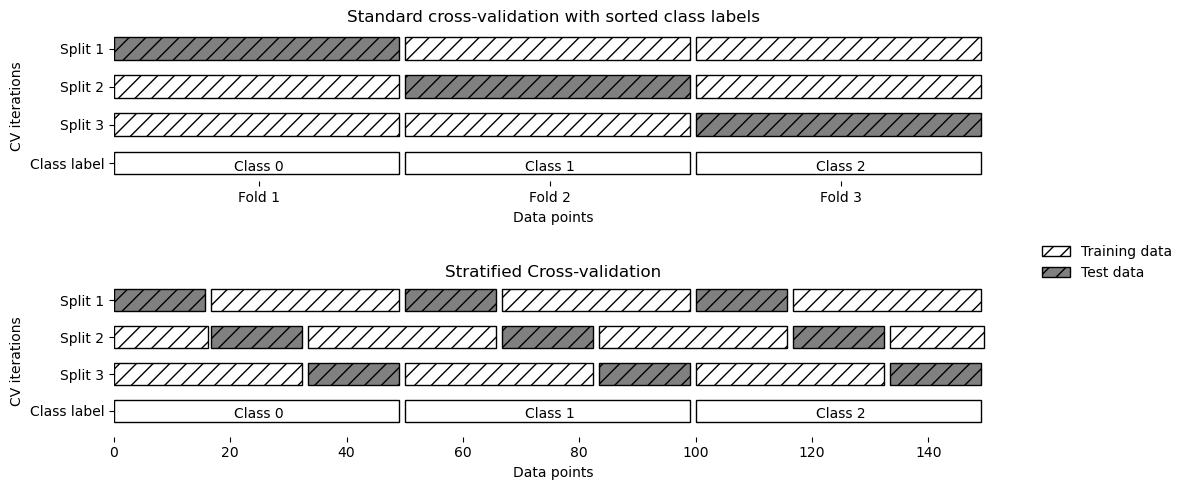

In [21]:
mglearn.plots.plot_stratified_cross_validation()

Например, если 90% примеров относятся к классу А, а 10% примеров
– к классу В, то стратифицированная перекрестная проверка
выполняется так, чтобы в каждом блоке 90% примеров принадлежали к
классу А, а 10% примеров – к классу B.
Использование для оценки классификатора стратифицированной k-
блочной перекрестной проверки вместо обычной k-блочной
перекрестной является хорошей идеей, поскольку позволяет получить
более надежные оценки обобщающей способности. В ситуации, когда
лишь 10% примеров принадлежат к классу В, использование стандартной
k-блочной перекрестной проверки может привести к тому, что один из
блоков будет полностью состоять из примеров, относящихся к классу А.
Использование этого блока в качестве тестового набора не даст особой
информации о качестве работы классификатора.
Для регрессии в scikit-learn по умолчанию используется
стандартная k-блочная кросс-проверка. Можно было бы еще попытаться
создать блоки, представляющие различные значения количественной
зависимой переменной, но данный метод не является
общераспространенной стратегией и был бы неожиданностью для
большинства пользователей.

#### Больше контроля над перекрестной проверкой

Ранее мы уже видели, что можно настроить количество блоков,
используемое в cross_val_score, с помощью параметра cv. Однако
scikit-learn позволяет значительно точнее настроить процесс
перекрестной проверки, используя в качестве параметра cv генератор
разбиений перекрестной проверки (cross-validation splitter). В
большинстве случаев значения параметров, выставленные по умолчанию для k-блочной перекрестной проверки в случае регрессии и
стратифицированной k-блочной проверки в случае классификации дают
хорошие результаты, однако бывают ситуации, когда вы, возможно,
захотите использовать другую стратегию. Допустим, мы хотим
применить k-блочную перекрестную проверку к классификационному
набору данных, чтобы воспроизвести чьи-то результаты. Для этого мы
должны сначала импортировать класс KFold из модуля model_selection
и создать его экземпляр, задав нужное количество блоков:

In [22]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

Затем мы можем передать генератор разбиений kfold в качестве
параметра cv в функцию cross_val_score.

In [23]:
print("Значения правильности перекрестной проверки:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[1.         1.         0.86666667 0.93333333 0.83333333]


Таким образом, мы можем убедиться, что использование трехблочной
(нестратифицированной) перекрестной проверки для набора данных
iris действительно является очень плохой идеей:

In [25]:
kfold = KFold(n_splits=3)
print("Значения правильности перекрестной проверки:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[0. 0. 0.]


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target, cv=3)
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.98 0.96 0.98]


Вспомним, что в наборе данных iris каждый блок соответствует
одному классу и поэтому, применив нестратифицированную
перекрестную проверку, мы ничего не сможем узнать о правильности
модели. Еще один способ решения этой проблемы состоит в том, чтобы
вместо стратификации перемешать данные и тем самым нарушить
порядок сортировки примеров, определяемый их метками. Мы можем
сделать это, передав генератору KFold параметр shuffle=True. Если мы
перемешиваем данные, нам необходимо зафиксировать random_state,
чтобы воспроизвести результат перемешивания. В противном случае
каждый прогон cross_val_score будет давать разный результат,
поскольку каждый раз используется разное разбиение (это не является
проблемой, но может привести к неожиданным результатам).
Перемешивание данных перед их разбиением дает гораздо лучший
результат:

In [26]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Значения правильности перекрестной проверки:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[0.98 0.96 0.96]


In [30]:
len(iris.target)

150

#### Перекрестная проверка с исключением по одному

Еще один часто используемый метод перекрестной проверки –
исключение по одному (leave-one-out). Перекрестную проверку с
исключением по одному можно представить в виде k-блочной
перекрестной проверки, в которой каждый блок представляет собой
отдельный пример. По каждому разбиению вы выбираете одну точку
данных в качестве тестового набора. Этот вид проверки может занимать
очень много времени, особенно при работе с большими наборами данных,
однако иногда позволяет получить более точные оценки на небольших
наборах данных:

In [32]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Количество итераций: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций:  150
Средняя правильность: 0.97


#### Перекрестная проверка со случайными перестановками при разбиении

Еще одной, очень гибкой стратегией перекрестной проверки является
перекрестная проверка со случайными перестановками при разбиении
(shuffle-split cross-validation). В этом виде проверки каждое разбиение
выбирает train_size точек для обучающего набора и test_size точек для
тестового набора (при этом обучающее и тестовое подмножества не
пересекаются). Точки выбираются с возвращением. Разбиение
повторяется n_iter раз. Рис. иллюстрирует четырехпроходное
разбиение набора данных, состоящего из 10 точек, на обучающий набор
из 5 точек и тестовый набор из 2 точек (чтобы задать абсолютные
размеры этих подмножеств вы можете использовать для train_size и
test_size целочисленные значения, либо числа с плавающей точкой,
чтобы задать доли от общей выборки):

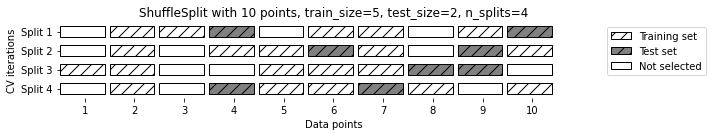

In [31]:
mglearn.plots.plot_shuffle_split()

#### Перекрестная проверка со случайными перестановками при разбиении для набора данных из 10 точек, train_size=5, test_size=2 и n_iter=4

Программный код, приведенный ниже, 10 раз разбивает данные на
50%-ный обучающий набор и 50%-ный тестовый набор:

In [49]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.2, train_size=.3, n_splits=20, random_state=0)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Значения правильности перекрестной проверки:\n{}".format(scores))
print("Mean:\n{}".format(scores.mean()))

Значения правильности перекрестной проверки:
[1.         0.96666667 0.93333333 0.96666667 0.96666667 0.93333333
 1.         0.96666667 0.93333333 1.         0.96666667 0.96666667
 0.96666667 0.96666667 0.96666667 0.86666667 1.         0.93333333
 0.96666667 1.        ]
Mean:
0.9633333333333333


Перекрестная проверка со случайными перестановками при
разбиении позволяет задавать количество итераций независимо от
размеров обучающего и тестового наборов, что иногда может быть
полезно. Кроме того, этот метод позволяет использовать на каждой
итерации лишь часть данных (значения train_size и test_size
необязательно должны в сумме давать 1). Подобное прореживание
данных может быть полезно при работе с большими наборами данных.
Существует также стратифицированный вариант ShuffleSplit,
названный StratifiedShuffleSplit, который позволяет получить более
надежные результаты при решении задач классификации.

#### Перекрестная проверка с использованием групп

Еще одна весьма распространенная настройка для перекрестной
проверки применяется, когда данные содержат сильно взаимосвязанные
между собой группы. Допустим, вы хотите построить систему
распознавания эмоций по фотографиям лиц и для этого вы собрали
набор изображений 100 человек, в котором каждый человек
сфотографирован несколько раз, чтобы зафиксировать разные эмоции.
Цель заключается в том, чтобы построить классификатор, который
сможет правильно определить эмоции людей, не включенных в этот
набор изображений. В данном случае для оценки качества работы
классификатора вы можете использовать традиционную
стратифицированную перекрестную проверку. Однако, вполне вероятно,
что фотографии одного и того же человека попадут как в обучающий, так
и в тестовый наборы. По сравнению с совершенно новым лицом классификатору намного проще будет определить эмоции по лицу,
которое уже встречалось ему в обучающем наборе. Чтобы точно оценить
способность модели обобщать результат на новые лица, необходимо
убедиться в том, что обучающий и тестовый наборы содержат
изображения разных людей.
Для решения этой задачи мы можем воспользоваться GroupKFold,
принимающий в качестве аргумента массив groups. С помощью него мы
указываем, какой человек изображен на снимке. В данном случае массив
groups указывает группы данных, которые не следует разбивать при
создании обучающего и тестового наборов, при этом их не следует путать
с метками классов.
Подобные группы данных часто встречаются в медицинской
практике, когда у вас, возможно, есть несколько наблюдений по одному
и тому же пациенту, но вы заинтересованы в обобщении результатов на
новых пациентов. Аналогично в задачах распознавания речи у вас может
быть несколько записей одного и того же человека, но вас интересует
точность распознавания речи новых людей.
Ниже приведен пример с использованием синтетического набора
данных, группировка данных задана массивом groups. Набор данных
состоит из 12 точек данных, и для каждой точки массив groups задает
группу (допустим, пациента), к которой относится эта точка. У нас
существуют четыре группы, первые три примера принадлежат к первой
группе, следующие четыре примера принадлежат ко второй группе и так
далее:

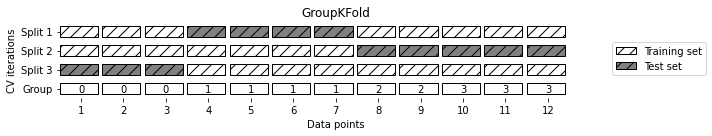

In [33]:
mglearn.plots.plot_group_kfold()

In [50]:
from sklearn.model_selection import GroupKFold
# создаем синтетический набор данных
X, y = make_blobs(n_samples=12, random_state=0)
# предположим, что первые три примера относятся к одной и той же группе,
# затем следующие четыре и так далее.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(estimator=logreg, X = X, y = y, groups = groups, cv=GroupKFold(n_splits=3))
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[0.75       0.6        0.66666667]


In [53]:
y

array([1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 2, 1])

Примеры не нужно сортировать по группам, мы сделали это в
иллюстративных целях. Разбиения, вычисляемые на основе этих меток,
показаны на рис. 
Видно, что при выполнении разбиении каждая группа полностью
попадает либо в обучающий набор, либо в тестовый набор.

В библиотеке scikit-learn есть и другие стратегии разбиения данных
для перекрестной проверки, которые предполагают еще большее
разнообразие вариантов использования (вы можете найти их в
руководстве пользователя по scikit-learn). Однако стандартные
стратегии KFold, StratifiedKFold и GroupKFold на сегодняшний день
используются чаще всего.

### Решетчатый поиск

Теперь, когда мы знаем, как оценивать обобщающую способность, мы
можем сделать следующий шаг и улучшить обобщающую способность
модели, настроив ее параметры. Ранее мы обсуждали настройки
параметров различных алгоритмов в scikit-learn, однако важно понять
содержательный смысл этих параметров, прежде чем пытаться
корректировать их. Поиск оптимальных значений ключевых параметров
модели (то есть значений, которые дают наилучшую обобщающую
способность) является сложной задачей, но она обязательна почти для
всех моделей и наборов данных. Поскольку поиск оптимальных значений
параметров является общераспространенной задачей, библиотека
scikit-learn предлагает стандартные методы, позволяющие решить ее.
Наиболее часто используемый метод – это решетчатый поиск (grid
search), который по сути является попыткой перебрать все возможные
комбинации интересующих параметров.
Рассмотрим применение ядерного метода SVM с ядром RBF
(радиальной базисной функцией), реализованного в классе SVC. В ядерном методе опорных векторов есть два
важных параметра: ширина ядра gamma и параметр регуляризации C.
Допустим, мы хотим попробовать значения 0.001, 0.01, 0.1, 1, 10 и 100
для параметра С и то же самое для параметра gamma. Поскольку нам
нужно попробовать шесть различных настроек для C и gamma, получается
36 комбинаций параметров в целом. Все возможные комбинации
формируют таблицу (которую еще называют решеткой или сеткой)
настроек параметров для SVM.

#### Простой решетчатый поиск

Мы можем реализовать простой решетчатый поиск с помощью
вложенных циклов for по двум параметрам, обучая и оценивая
классификатор для каждой комбинации:

In [35]:
# реализация наивного решетчатого поиска
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Размер обучающего набора: {} размер тестового набора: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем качество SVC на тестовом наборе
        score = svm.score(X_test, y_test)
        # если получаем наилучшее значение правильности, 
        # сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Наилучшее значение правильности: {:.2f}".format(best_score))
print("Наилучшие значения параметров:: {}".format(best_parameters))

Размер обучающего набора: 112 размер тестового набора: 38
Наилучшее значение правильности: 0.97
Наилучшие значения параметров:: {'C': 100, 'gamma': 0.001}


####  Опасность переобучения параметров и проверочный набор данных

Получив такой результат, мы могли бы поддаться искушению и заявить,
что нашли модель, которая дает 97%-ную правильность на нашем наборе
данных. Однако это заявление может быть чрезмерно оптимистичным
(или просто неверным) по следующей причине: мы перебрали множество
значений параметров и выбрали ту комбинацию значений, которая дает
наилучшую правильность на тестовом наборе, но это вовсе не означает,
что на новых данных мы получим такое же значение правильности.
Поскольку мы использовали тестовый набор для настройки параметров,
мы больше не можем использовать его для оценки качества модели. Это
та же самая причина, по которой нам изначально нужно разбивать
данные на обучающий и тестовый наборы. Теперь для оценки качества
модели нам необходим независимый набор данных, то есть набор,
который не использовался для построения модели и настройки ее
параметров.
Один из способов решения этой проблемы заключается в том, чтобы
разбить данные еще раз, таким образом, мы получаем три набора:
обучающий набор для построения модели, проверочный
(валидационный) набор для выбора параметров модели, а также
тестовый набор для оценки качества работы выбранных параметров. Рис.
показывает, как это выглядит:

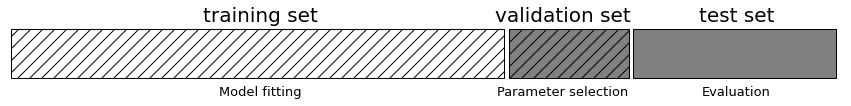

In [36]:
mglearn.plots.plot_threefold_split()

После выбора наилучших параметров с помощью проверочного
набора проверки, мы можем заново построить модель, используя
найденные настройки, но теперь на основе объединенных обучающих и
проверочных данных. Таким образом, мы можем использовать для
построения модели максимально возможное количество данных. Это
приводит к следующему программному коду:

In [37]:
from sklearn.svm import SVC
# разбиваем данные на обучающий+проверочный набор и тестовый набор
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# разбиваем обучающий+проверочный набор на обучающий и проверочный наборы
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем качество SVC на тестовом наборе
        score = svm.score(X_valid, y_valid)
        # если получаем наилучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# заново строим модель на наборе, полученном в результате объединения обучающих
# и проверочных данных, оцениваем качество модели на тестовом наборе
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))

Размер обучающего набора: 84 размер проверочного набора: 28 размер тестового набора: 38

Лучшее значение правильности на проверочном наборе: 0.96
Наилучшие значения параметров:  {'C': 10, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.92


Лучшее значение правильности на проверочном наборе составляет
96%, что немного ниже значения правильности, полученного для
тестового набора ранее, вероятно, из-за того, что мы использовали
меньше данных для обучения модели (размер X_train теперь стал
меньше, поскольку что мы разбили наш набор данных дважды). Однако
значение правильности на тестовом наборе, значение, которое
показывает реальную обобщающую способность – стало еще ниже, 92%.
Таким образом, мы можем утверждать, что правильность классификации
новых данных составляет 92%, а не 97%, как мы думали ранее!
Наличие различий между обучающим, проверочным и тестовым
наборами имеет принципиально важное значение для применения
методов машинного обучения на практике. Любой выбор, сделанный,
исходя из правильности на тестовом наборе, «сливает» модели
информацию тестового набора. Поэтому важно иметь отдельный
тестовый набор, который используется лишь для итоговой оценки.
Осуществление всего разведочного анализа и отбора модели с помощью
комбинации обучающего и проверочного наборов и резервирование
тестового набора для итоговой оценки является хорошей практикой.
Данная практика является верной даже при проведении разведочной
визуализации. Строго говоря, оценка качества моделей и выбор
наилучшей из них с помощью тестового набора, использующегося для
отбора параметров, приведет к чрезмерно оптимистичной оценке
правильности модели.

#### Решетчатый поиск с перекрестной проверкой

Хотя только что рассмотренный нами метод разбиения данных на
обучающий, проверочный и тестовый наборы является вполне рабочим
и относительно широко используемым, он весьма чувствителен к
правильности разбиения данных. Взглянув на вывод, приведенный для
предыдущего фрагмента программного кода, мы видим, что GridSearchCV выбрал в качестве лучших параметров 'C': 10, 'gamma': 0.001, тогда
как вывод, приведенный для программного кода в предыдущем разделе,
сообщает нам, что наилучшими параметрами являются 'C': 100,
'gamma': 0.001. Для лучшей оценки обобщающей способности вместо
одного разбиения данных на обучающий и проверочный наборы мы
можем воспользоваться перекрестной проверкой. Теперь качество
модели оценивается для каждой комбинации параметров по всем
разбиениям перекрестной проверки. Этот метод можно реализовать с
помощью следующего программного кода:

In [39]:
import numpy as np
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров,
        # обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        # выполняем перекрестную проверку
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # вычисляем среднюю правильность перекрестной проверки
        score = np.mean(scores)
        # если получаем лучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате
# объединения обучающих и проверочных данных
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

Чтобы c помощью пятиблочной перекрестной проверки оценить
правильность SVM для конкретной комбинации значений C и gamma, нам
необходимо обучить 36*5=180 моделей. Как вы понимаете, основным
недостатком использования перекрестной проверки является время,
которое требуется для обучения всех этих моделей.
Следующая визуализация показывает, как в предыдущем
программном коде осуществляется выбор оптимальных параметров:

In [44]:
#mglearn.plots.plot_cross_val_selection()

Для каждой комбинации значений С и gamma (здесь показана лишь
часть комбинаций) вычисляются пять значений правильности, по одному
для каждого разбиения в перекрестной проверке. Затем для каждой
комбинации параметров вычисляется среднее значение правильности
перекрестной проверки. В итоге выбирается комбинация с наибольшей
средней правильностью перекрестной проверки и отмечается кружком.
Общий процесс разбиения данных, запуска решетчатого поиска, а
также оценки итоговых параметров показан на рис.:

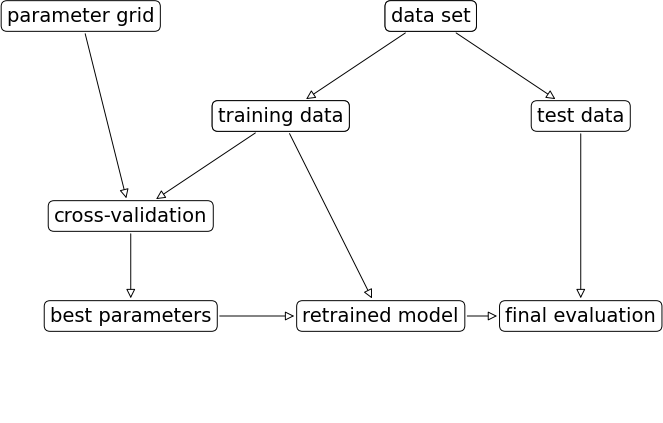

In [42]:
mglearn.plots.plot_grid_search_overview()

Поскольку решетчатый поиск с перекрестной проверкой является
весьма распространенным методом настройки параметров, библиотека
scikit-learn предлагает класс GridSearchCV, в котором решетчатый
поиск реализован в виде модели. Чтобы воспользоваться классом
GridSearchCV, сначала необходимо указать искомые параметры с
помощью словаря. GridSearchCV построит все необходимые модели.
Ключами словаря являются имена настраиваемых параметров (в данном
случае С и gamma), а значениями – тестируемые настройки параметров.
Перебор значений 0.001, 0.01, 0.1, 1, 10 и 100 для C и gamma требует
словаря следующего вида:

In [45]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Сетка параметров:\n{}".format(param_grid))

Сетка параметров:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


Теперь мы можем создать экземпляр класса GridSearchCV, передав
модель (SVC), сетку искомых параметров (param_grid), а также стратегию
перекрестной проверки, которую мы хотим использовать (допустим,
пятиблочную стратифицированную перекрестную проверку):

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)

Вместо разбиения на обучающий и проверочный набор,
использованного нами ранее, GridSearchCV запустит перекрестную
проверку. Однако нам по-прежнему нужно разделить данные на
обучающий и тестовый наборы, чтобы избежать переобучения
параметров:

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

Созданный нами объект grid_search аналогичен классификатору, мы
можем вызвать стандартные методы fit, predict и score от его имени.31
Однако, когда мы вызываем fit, он запускает перекрестную проверку
для каждой комбинации параметров, указанных в param_grid:

In [49]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

Процесс подгонки объекта GridSearchCV включает в себя не только
поиск лучших параметров, но и автоматическое построение новой модели
на всем обучающем наборе данных. Для ее построения используются
параметры, которые дают наилучшее значение правильности
перекрестной проверки. Поэтому процесс, запускаемый вызовом метода
fit, эквивалентен программному коду, который мы видели в
начале этого занятия. Класс GridSearchCV предлагает очень удобный
интерфейс для работы с моделью, используя методы predict и score.
Чтобы оценить обобщающую способность найденных наилучших
параметров, мы можем вызвать метод score:

In [50]:
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


Выбрав параметры с помощью перекрестной проверки, мы
фактически нашли модель, которая достигает правильности 97% на
тестовом наборе. Главный момент здесь в том, что мы не использовали
тестовый набор для отбора параметров. Найденная комбинация
параметров сохраняется в атрибуте best_params_, а наилучшее значение
правильности перекрестной проверки (значение правильности,
усредненное по всем разбиениям для данной комбинации параметров) –
в атрибуте best_score_.

In [51]:
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(grid_search.best_score_))

Наилучшие значения параметров: {'C': 10, 'gamma': 0.1}
Наилучшее значение кросс-валидац. правильности: 0.97


Опять же, будьте осторожны, чтобы не перепутать best_score_ со
значением обобщающей способности модели, которое
вычисляется на тестовом наборе с помощью метода score. Метод
score (оценивающий качество результатов, полученных с
помощью метода predict) использует модель, построенную на
всем обучающем наборе данных. В атрибуте best_score_
записывается средняя правильность перекрестной проверки. Для
ее вычисления используется модель, построенная на обучающем
наборе перекрестной проверки.

В ряде случаев вам необходимо будет ознакомиться с полученной
моделью, например, взглянуть на коэффициенты или важности
признаков. Посмотреть наилучшую модель, построенную на всем
обучающем наборе, вы можете с помощью атрибута best_estimator_:

In [52]:
print("Наилучшая модель:\n{}".format(grid_search.best_estimator_))

Наилучшая модель:
SVC(C=10, gamma=0.1)


Поскольку grid_search уже сам по себе включает методы predict и
score, использование best_estimator_ для получения прогнозов и
оценки качества модели не требуется.

##### Анализ результатов перекрестной проверки

Часто  бывает  полезно  визуализировать  результаты  перекрестной 
проверки,  чтобы  понять,  как  обобщающая  способность  зависит  от 
искомых  параметров.  Поскольку  выполнение  решетчатого  поиска 
довольно  затратно  с  вычислительной  точки  зрения,  целесообразно 
начинать  поиск  с  простой  и  небольшой  сетки  параметров.  Затем  мы 
можем  проверить  результаты  решетчатого  поиска,  использовав 
перекрестную проверку, и, возможно, расширить наш поиск. Результаты 
решетчатого  поиска  можно  найти  в  атрибуте  cv_results,  который 
является  словарем,  хранящим  все  настройки  поиска.  Как  вы  можете 
увидеть  в  выводе,  приведенном  ниже,  словарь  содержит  множество деталей и принимает более привлекательный вид после преобразования 
в DataFrame. 

In [53]:
import pandas as pd
# преобразуем в DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# показываем первые 5 строк
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000800,0.000400,0.0004,0.000490,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.000790,0.000395,0.0004,0.000491,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.000995,0.000012,0.0000,0.000000,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.000600,0.000490,0.0004,0.000490,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.000600,0.000490,0.0006,0.000490,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


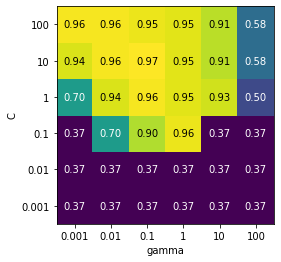

In [56]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# строим теплокарту средних значений правильности перекрестной проверки 
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis");

##### Тепловая карта для усредненной правильности перекрестной проверки выраженной в виде функции двух параметров C и gamma

Каждое  значение  тепловой  карты  соответствует  средней 
правильности  перекрестной  проверки  для  конкретной  комбинации 
параметров.  Цвет  передает  правильность  перекрестной  проверки, 
светлые  тона  соответствуют  высокой  правильности,  темные  тона  – 
низкой правильности. Видно, что SVC очень чувствителен к настройке 
параметров.  Для  большинства  настроек  параметров  правильность 
составляет около 40%, что довольно плохо; для остальных параметров 
правильность  составляет  около  96%.  Из  этого  графика  мы  можем 
вынести  несколько  моментов.  Во-первых,  параметры,  которые  мы 
корректировали,  очень  важны  для  получения  хорошей  обобщающей 
способности.  Оба  параметра  (C  и  gamma)  имеют  большое  значение, 
поскольку их корректировка позволяет повысить правильность с 40% до 
96%.  Кроме  того,  интервалы  значений,  которые  мы  выбрали  для 
параметров,  представляют  собой  диапазоны,  в  которых  мы  видим 
существенные изменения результатов. Кроме того, важно отметить, что 
диапазоны  параметров  достаточно  велики:  оптимальные  значения  для 
каждого параметра расположены не по краям, а по центру графика. 
Теперь давайте посмотрим еще на несколько графиков (показаны на рис.),  где  результат  получился  менее  идеальным,  поскольку 
диапазоны поиска не были подобраны правильно: 

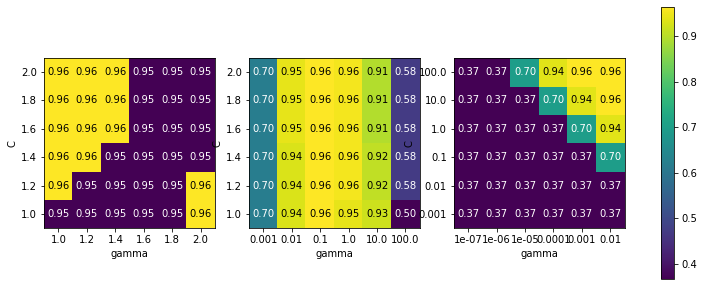

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # строим теплокарту средних значений правильности перекрестной проверки 
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

Первый график показывает, что независимо от выбранных параметров 
никакого  изменения  правильности  не  происходит,  все  значения 
правильности выделены одним и тем же цветом. В данном случае это 
вызвано  неправильным  масштабированием  и  диапазоном  значений 
параметров C и gamma. Однако, если различные настройки параметров не 
приводят  к  видимому  изменению  правильности,  это  еще  может 
указывать на то, что данный параметр просто не важен. Как правило, 
сначала лучше задать крайние значения, чтобы посмотреть, меняется ли 
правильность в результате корректировки параметра. 
Второй график показывает значения правильности, сгруппированные 
в  виде  вертикальных  полос.  Данный  факт  указывает  на  то,  что  лишь 
изменение параметра gamma влияет на правильность. Это может означать, 
что  для  параметра  gamma  заданы  более  интересные  значения,  чем  для 
параметра С, либо это означает, что параметр C не важен. 
Третья  панель  показывает  изменения  правильности  для  обеих 
параметров. Однако мы видим, что в левой нижней части графика ничего 
интересного не происходит. Вероятно, в будущем мы можем исключить 
из поиска очень малые значения. Оптимальная комбинация параметров 
находится  в  правом  верхнем  углу.  Поскольку  оптимальное  значение 
находится  на  границе  графика,  можно  ожидать,  что,  вероятно,    за 
пределами этой границы существуют лучшие значения, и мы могли бы 
изменить  наш  диапазон  поиска,  чтобы  включить  большее  количество 
значений в этой области. 
Настройка сетки параметров с помощью перекрестной проверки – это 
хороший способ исследовать важность различных параметров. Однако, 
как мы уже обсуждали ранее, значения различных параметров не должны 
проверяться на итоговом тестовом наборе, качество модели на тестовом 
наборе должно оцениваться лишь один раз, когда мы точно знаем, какую 
модель хотим использовать. 

##### Экономичный решетчатый поиск

В  некоторых  случаях  перебор  всех  возможных  комбинаций  по  всем 
параметрам,  который  обычно  выполняет  GridSearchCV,  не  является 
хорошей идеей. Например, SVC имеет параметр kernel, и в зависимости 
от  того,  какое  ядро  выбрано,  все  остальные  параметры  будут  иметь 
соответствующие этому выбору значения. Если kernel='linear', модель 
является линейной и используется только параметр С. Если используется 
kernel='rbf',  используются  параметры  C  и  gamma  (однако  другие 
параметры типа degree не используются). В этом случае поиск по всем 
возможным  комбинациям  C,  gamma  и  kernel  не  имеет  смысла:  если 
kernel='linear',  то  gamma  не  используется  и  перебор  различных 
значений gamma – это пустая трата времени. Чтобы обработать подобные 
«условные» параметры, GridSearchCV позволяет превратить param_grid в 
список  словарей.  Каждый  словарь  в  списке  выделяется  в 
самостоятельную  сетку  параметров.  Возможный  решетчатый  поиск, 
включающий  настройки  ядра  и  параметров,  мог  бы  выглядеть 
следующим образом: 

In [60]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("Список параметров:\n{}".format(param_grid))

Список параметров:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


В  первой  сетке  параметр  kernel  всегда  принимает  значение  'rbf' 
(обратите  внимание,  элемент  параметра  kernel  представляет  собой 
список единичной длины), изменяются значения как параметра C, так и 
параметра  gamma.  Во  второй  сетке  параметр  kernel  всегда  принимает 
значение linear и поэтому изменяется только параметр С. Теперь давайте 
применим этот более сложный поиск параметров: 

In [61]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print("Наилучшие параметры: {}".format(grid_search.best_params_))
print("Лучшая правильность на перекрестной проверке: {:.2f}".format(grid_search.best_score_))

Наилучшие параметры: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Лучшая правильность на перекрестной проверке: 0.97


Давайте снова посмотрим на cv_results_. Как и следовало ожидать, 
если kernel имеет значение 'linear', то меняется только параметр C: 

In [62]:
results = pd.DataFrame(grid_search.cv_results_)
# мы выводим транспонированную таблицу для лучшего отображения на странице: 
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.001012,0.001,0.000994,0.000411,0.0008,0.000794,0.0006,0.0002,0.000206,0.000395,...,0.0,0.000806,0.000605,0.000999,0.000399,0.0006,0.0002,0.0,0.0,0.0
std_fit_time,0.000024,0.000018,0.000021,0.000504,0.0004,0.000397,0.00049,0.000399,0.000412,0.000484,...,0.0,0.000403,0.000494,0.000001,0.000489,0.00049,0.0004,0.0,0.0,0.0
mean_score_time,0.0,0.000402,0.0,0.000612,0.000395,0.0004,0.0006,0.00061,0.001007,0.000394,...,0.0004,0.0,0.000406,0.0002,0.0002,0.0002,0.0,0.0,0.0,0.0
std_score_time,0.0,0.000493,0.0,0.0005,0.000483,0.00049,0.00049,0.000499,0.000011,0.000483,...,0.000489,0.0,0.000497,0.0004,0.0004,0.0004,0.0,0.0,0.0,0.0
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


#### Применение различных стратегий перекрестной проверки с помощью решетчатого поиска

Как  и  cross_val_score,  GridSearchCV  использует  по  умолчанию  k-
блочную  перекрестную  проверку  для  классификации  и  k-блочную 
перекрестную  проверку  для  регрессии.  Однако  при  использовании 
GridSearchCV  вы  можете  дополнительно  передать  любой  генератор 
разбиения  в качестве параметра cv. В частности, чтобы 
получить только одно разбиение на обучащий и проверочный наборы, вы 
можете  воспользоваться  ShuffleSplit  или  StratifiedShuffleSplit  с 
n_iter=1.  Данная  настройка  может  оказаться  полезной  для  очень 
больших наборов данных или очень медленных моделей. 

#### Вложенная перекрестная проверка

В  предыдущих  примерах  мы  прошли  путь  от  использования  одного 
разбиения  данных  на  обучающий,  проверочный  и  тестовый  наборы до  разбиения  данных  на  обучающий  и  тестовый  наборы  с 
проведением  перекрестной  проверки  на  обучающем  наборе.  Но  при 
использовании  GridSearchCV  ранее  описанным  способом  мы  все  еще 
выполняем всего лишь одно разбиение на обучающий и тестовый наборы, 
что может привести к получению нестабильных результатов и ставит нас 
в  зависимость  от  этого  единственного  разбиения  данных.  Мы  можем 
пойти  дальше  и  вместо  однократного  разбиения  исходных  данных  на 
обучающий  и  тестовый  наборы  использовать  несколько  разбиений 
перекрестной  проверки.  В  результате  мы  получим  вложенную 
перекрестную  проверкой  (nested  cross-validation).  Во  вложенной 
перекрестной  проверке  используется  внешний  цикл  по  разбиениям 
данных  на  обучающий  и  тестовый  наборы.  Для  каждого  из  них 
выполняется  решетчатый  поиск  (в  результате  чего  для  каждого 
разбиения  внешнего  цикла  можно  получить  разные  наилучшие 
параметры).  Затем  для  каждого  внешнего  разбиения  выводится 
правильность  на  тестовом  наборе  с  использованием  наилучших 
параметров.
Результатом  этой  процедуры  является  не  модель  и  не  настройки 
параметров,  а  список  значений  правильности.  Значения  правильности 
указывают нам на обобщающую способность модели с использованием 
лучших параметров, найденных в ходе решетчатого поиска. Поскольку 
вложенная  перекрестная  проверка  не  дает  модель,  которую  можно 
использовать  на  новых  данных,  ее  редко  используют  при  поиске 
прогнозной модели для применения к новым данным. Тем не менее, она может быть полезна для оценки работы модели на конкретном наборе 
данных. 
Реализовать  вложенную  перекрестную  проверку  в  scikit-learn 
довольно  просто.  Мы  вызываем  cross_val_score  и  передаем  ей 
экземпляр GridSearchCV в качестве модели. 

In [64]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Значения правильности перекрестной проверки: ", scores)
print("Среднеее значение правильности перекрестной проверки: ", scores.mean())

Значения правильности перекрестной проверки:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Среднеее значение правильности перекрестной проверки:  0.9800000000000001


Результат  нашей  вложенной  перекрестной  проверки  можно 
резюмировать так: «на наборе данных iris модель SVC может достигнуть 
средней  правильности  перекрестной  проверки  98%»  –  ни  больше,  ни 
меньше. 
В  данном  случае  мы  использовали  стратифицированную 
пятиблочную  перекрестную  проверку  как  во  внутреннем,  так  и  во 
внешнем  циклах.  Поскольку  наша  сетка  param_grid  содержит  36 
комбинаций параметров, будет построено целых 36 * 5 * 5 = 900 моделей, 
что делает процедуру вложенной перекрестной проверки очень затратной 
с  вычислительной  точки  зрения.  В  данном  случае  во  внутреннем  и 
внешнем циклах мы использовали один и тот же генератор разбиений, 
однако  это  не  является  необходимым  условием  и  поэтому  для 
внутреннего  и  внешнего  циклов  вы  можете  использовать  любую 
комбинацию  стратегий  перекрестной  проверки.  Понимание  процесса, 
который  происходит  внутри  одной  строки,  приведенной  выше,  может 
представлять  определенную  сложность.  Данный  процесс  можно 
визуализировать с помощью циклов for, как это сделано в следующей 
упрощенной реализации программного кода:

In [66]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    #  для каждого разбиения данных во внешней перекрестной проверке 
    # (метод split возвращает индексы)
    for training_samples, test_samples in outer_cv.split(X, y):
        #находим наилучшие параметры с помощью внутренней перекрестной проверки
        best_parms = {}
        best_score = -np.inf
        # итерируем по параметрам
        for parameters in parameter_grid:
            # собираем значения правильности по всем внутренним разбиениям
            cv_scores = []
            # итерируем по разбиениям внутренней перекрестной проверки
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # строим классификатор с данными параметрами на внутреннем обучающем наборе
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # оцениваем качество на внутреннем тестовом наборе
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # вычисляем среднее значение правильности по внутренним блокам
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # если лучше, чем предыдущие, запоминаем параметры
                best_score = mean_score
                best_params = parameters
        # строим классификатор с лучшими параметрами на внешнем обучающем наборе
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # оцениваем качество на внешнем тестовом наборе 
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

Теперь давайте применим эту функцию к набору данных iris:

In [67]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.96666667 1.         0.96666667 0.96666667 1.        ]


##### Распараллеливание перекрестной проверки и решетчатого поиска

Несмотря  на  то,  что  выполнение  решетчатого  поиска  с  большим  
количеством  параметров  на  огромных  наборах  данных  может 
представлять  сложность  с  вычислительной  точки  зрения,  эта  задача 
является  чрезвычайно  параллельной  (embarrassingly  parallel).  Это 
означает,  что  построение  модели  с  использованием  конкретной 
настройки параметра для конкретного разбиения перекрестной проверки 
может  осуществляться  независимо  от  других  настроек  параметров  и 
моделей.  Данный  факт  делает  решетчатый  поиск  и  перекрестную 
проверку  идеальными  кандидатами  для  распараллеливания  по 
нескольким процессорным ядрам или распараллеливания на кластере. В 
GridSearchCV  и  cross_val_score  вы  можете  использовать  несколько 
процессорных ядер, задав значение параметра n_jobs равным нужному количеству ядер. Вы можете установить n_jobs=-1, чтобы использовать 
все доступные ядра. 
Имейте  в  виду,  что  scikit-learn  не  поддерживает  вложенность 
параллельных операций (nesting of parallel operations). Поэтому, если вы 
используете опцию n_jobs для вашей модели (например, для случайного 
леса), вы не можете использовать ее в GridSearchCV для осуществления 
поиска  по  этой  модели.  При  работе  с  большими  наборами  данных  и 
сложными  моделями  использование  большого  числа  ядер,  возможно, 
потребует  слишком  много  памяти  и  вы  должны  контролировать  ее 
использование памяти при параллельном построении больших моделей. 
Кроме того, можно распараллелить решетчатый поиск и перекрестную 
проверку по нескольким машинам в кластере, хотя на момент написания 
книги  эта  возможность  в  scikit-learn  не  поддерживалась.  Однако 
можно  воспользоваться  IPython  parallel  для  выполнения 
параллельного решетчатого поиска, если вы согласны писать циклы for 
для  параметров,  как  мы  это  делали  в  разделе  «Простой  решетчатый 
поиск». 
Для  пользователей  Spark  существует  недавно  разработанный  пакет 
spark-sklearn, который позволяет запускать решетчатый поиск на уже 
готовом кластере Spark. 

### Метрики качества модели и их вычисление
До  сих  пор  мы  оценивали  качество  классификации,  используя 
правильность (score)  (долю  правильно  классифицированных  примеров),  и 
качество регрессии, используя R2. Однако это лишь два показателя из 
большого  количества  возможных  метрик,  используемых  для  оценки 
качества контролируемой модели на данном наборе данных. На практике 
эти метрики качества могут не соответствовать вашим задачам и поэтому 
очень важно при отборе моделей и корректировке параметров  подобрать 
правильную метрику. 



#### Помните о конечной цели!

Выбирая метрику, вы всегда должны помнить о конечной цели проекта. На практике мы, как правило, заинтересованы не 
только в создании точных прогнозов, но и в том, чтобы использовать их 
в рамках более масштабного процесса принятия решений. Прежде чем 
выбрать показатель качества машинного обучения, вам стоит подумать о 
высокоуровневой цели вашего проекта, которую часто называют бизнес-
метрикой  (business  metric).  Последствия,  обусловленные  выбором 
конкретного  алгоритма  для  того  или  иного  проекта,  называются влиянием  на  бизнес  (business  impact). Возможно,  высокоуровневой 
целью является предотвращение дорожно-транспортных происшествий 
или  уменьшение  числа  случаев  госпитализации.  Такой  целью  также 
может  увеличение  посещаемости  вашего  сайта  или  суммы  покупок  в 
вашем магазине. Вы должны выбрать такую модель или такие значения 
параметров, которые оказывают наибольшее положительное влияние на 
бизнес-метрику. Часто эта задача является трудной, поскольку оценка 
влияния конкретной модели на бизнес может потребовать ее внедрения 
в реальное производство. 
Как  правило,  на  ранних  этапах  разработки,  а  также  при  настройке 
параметров внедрить модель в производство только для тестирования не 
представляется  возможным  по  причине  возникновения  высоких 
коммерческих и человеческих рисков. Представьте себе, что вы, оценивая 
систему  предотвращения  столкновения  с  пешеходами,  которой 
оборудован  беспилотный  автомобиль,  просто  позволите 
автомобилю  ехать,  не  проверив  его.  Если  ваша  модель  имеет  низкое 
качество,  пешеходов  ждут  неприятности!  Поэтому  нам  обычно  нужно 
найти  какую-то  замещающую  процедуру  оценки,  которая  использует 
легко  вычисляемые  метрики  качества.  Например,  мы  могли  бы 
попробовать классифицировать изображения пешеходов и не-пешеходов 
и измерить правильность. Помните о том, что данная процедура является 
замещающей  и  она  оправдывает  себя,  позволяя  найти  метрику, 
максимально близкую  к исходной бизнес-цели и поддающуюся оценке. 
Данная метрика должна использоваться по возможности для оценки и 
отбора  модели.  Возможно,  что  в  результате  этой  процедуры  вы  не 
получите какой-то конкретной цифры,  например, вывод, найденный с 
помощью алгоритма, может звучат так: у вас на 10% больше клиентов, но 
каждый клиент будет тратить на 15% меньше – однако эта процедура 
должна оценить влияние на бизнес, зависящее от выбора той или иной 
модели. 
Далее мы  сначала  рассмотрим  метрики  для  бинарной 
классификации, затем обратимся к мультиклассовой классификации и в 
заключение обсудим регрессию.

#### Метрики для бинарной классификации
Бинарная  классификация  является,  пожалуй,  наиболее 
распространенным и концептуально простым примером практического 
применения  машинного  обучения.  Однако  даже  при  решении  этой простой  задачи    существует  целый  ряд  нюансов.  Прежде  чем  мы 
углубимся в альтернативные метрики, давайте рассмотрим ситуации, в 
которых  правильность  измерения  может  ввести  в  заблуждение. 
Вспомним,  что  в  случае  бинарной  классификации  мы  говорим  о 
положительном  (positive)  классе  и  отрицательном  (negative)  классе, 
подразумевая под положительным классом интересующий нас класс. 

##### Типы ошибок

Как  правило,  правильность  не  является  адекватным  показателем 
прогностической  способности,  поскольку  количество  совершаемых 
ошибок  не  содержит  весь  объем  интересующей  нас  информации. 
Представьте себе скрининговое обследование для раннего обнаружения 
рака,  построенное  на  основе  автоматизированного  теста.  Если  тест 
отрицателен,  пацент  будет  считаться  здоровым,  тогда  как  если  тест 
положителен,  пациент  будет  подвергнут  дополнительному 
обследованию.  Здесь  мы  называем  положительным  тестом  (наличие 
рака)  положительный  класс,  а  отрицательный  тест  соответствует 
отрицательному классу. Мы не можем быть уверены в отличной работе 
модели, она неизбежно будет совешать ошибки. Выполняя тот или иной 
проект, мы должны спросить себя, какими могут быть последствия этих 
ошибок в реальном мире. 
Одна из возможных ошибок заключается в том, что здоровый пациент 
будет классифицирован как больной (положительный класс), что даст 
повод для дополнительного тестирования. Дополнительное обследование 
приведет  к  некоторым  затратам  и  неудобствам  для  пациента  (и, 
возможно,  к  определенному  психическому  дискомфорту).  Пример, 
неправильно спрогнозированный как положительный, называется ложно 
положительным (false positive). Другая возможная ошибка состоит в том, 
что  больной  пациент  будет  классифицирован  как  здоровый 
(отрицательный класс), не пройдет дополнительные тесты и не получит 
лечения.  Недиагностированный  вовремя  рак  может  привести  к 
серьезным  проблемам  со  здоровьем  и  может  даже  закончиться 
смертельным  исходом.  Пример,  неправильно  спрогнозированный  как 
отрицательный,  называется  ложно  отрицательным  (false  negative).  В 
статистике ложно положительный пример также известен как ошибка I 
рода (type I error), а ложно отрицательный пример – как ошибка II рода 
(type  II  error).  Мы  будем  придерживаться  определений  «ложно 
отрицательный пример» и «ложно положительный пример», поскольку 
они  являются  более  явными  и  их  легче  запомнить.  В  примере  с 
диагностикой рака очевидно, что мы хотим минимизировать долю ложно 
отрицательных  примеров,  тогда  как  ложно  положительные  примеры 
можно считать гораздо менее значительной неприятностью.
Хотя вышеприведенный пример  является довольно ярким,  каждый 
ложно положительный и ложно отрицательный прогноз редко приводит 
к одним и тем же последствиям. В коммерческих проектах обоим видам 
ошибок можно присвоить определенные стоимости, которые позволяют 
измерить погрешность конкретного прогноза в денежном выражении, а 
не  с  точки  зрения  правильности.  Для  процесса  принятия  бизнес-
решений,  использующего  модель,  данный  шаг  имеет  гораздо  большее 
значение.

##### Несбалансированные наборы данных

Типы  ошибок  играют  важную  роль,  когда  один  из  двух  классов 
встречается  гораздо  чаще,  чем  другой.  Это  очень  распространенная 
ситуация на практике. Хорошим примером является прогноз рейтинга 
кликов, где каждая точка данных представляет собой «показ» – элемент, 
предъявленный пользователю. Этим элементом может быть объявление, 
рассказ,  пользователь  социальной  сети.  Цель  состоит  в  том,  чтобы 
предсказать, будет ли пользователь при показе данного элемента кликать 
по нему (что указывает на его интерес). Большинство из того, что видит 
пользователь  в  Интернете  (в  частности,  рекламные  объявления),  не 
вызывает  у  него  особого  интереса.  Вам  потребуется  показать 
пользователю 100 объявлений или статей, прежде чем он найдет что-то 
достаточно  интересное  для  себя,  чтобы  кликнуть.  Это  позволяет 
получить  набор  данных,  в  котором  99  точек  данных  соответствуют 
ситуации «не кликнул» и 1 точка данных – «кликнул». Другими словами, 
99% примеров относятся к классу «отсутствие клика». Наборы данных, в 
которых  один  класс  встречается  гораздо  чаще,  чем  остальные,  часто 
называют несбалансированными наборами данных (imbalanced datasets) 
или наборами данных с несбалансированными классами (datasets with 
imbalanced classes). В реальности несбалансированные данные являются 
нормой и редко бывает, что интересующий класс встречался в данных с 
одинаковой или почти такой же частотой, что и остальные классы. 
Теперь  предположим,  что  вы  строите  классификатор,  который  при 
решении задачи прогнозирования кликов имеет правильность 99%. О чем 
это  говорит?  Правильность  99%  звучит  впечатляюще,  но  она  не 
принимает во внимание дисбаланс классов. Вы можете достичь 99%-ной 
правильности  и  без  построения  модели  машинного  обучения,  всегда 
прогнозируя  «отсутствие  клика»  С  другой  стороны,  даже  для 
несбалансированных данных модель с 99%-ной правильностью могла бы 
быть  вполне  пригодной.  Однако  в  данном  случае  правильность  не 
позволяет  нам  отличить  модель  «постоянно  прогнозируем  отсутствие 
клика» от потенциально хорошей модели.
Чтобы проиллюстрировать это, мы на основе набора данных digits 
создадим несбалансированный набор данных с пропорциями 9:1, создав 
два класса «не-девятка» и «девятка»: 

In [68]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [76]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{False: 1617, True: 180}

Мы  можем  воспользоваться  DummyClassifier,  который  всегда 
предсказывает  мажоритарный  класс  (в  данном  случае  класс  «не-
девятка»),  чтобы  проиллюстрировать,  насколько  малоинформативной 
может быть правильность: 

In [77]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Уникальные спрогнозированные метки: {}".format(np.unique(pred_most_frequent)))
print("Правильность на тестовом наборе: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Уникальные спрогнозированные метки: [False]
Правильность на тестовом наборе: 0.90


Мы получили 90%-ную правильностью без какого-либо обучения Это 
может  показаться  поразительным,  но  задумайтесь  об  этом  на  минуту. 
Представьте  себе,  кто-то  говорит  вам,  что  его  модель  имеет  90%-ную 
правильность. Можно сделать вывод, что он проделал очень хорошую 
работу.  Но  это  вполне  возможно,  лишь  правильно  прогнозируя  один 
класс!  Давайте  сравним  этот  результат  с  результатом,  полученным  с 
помощью реальной модели: 

In [83]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Правильность на тестовом наборе: {:.2f}".format(tree.score(X_test, y_test)))

Правильность на тестовом наборе: 0.92


С точки зрения правильности DecisionTreeClassifier оказался чуть 
лучше,  чем  DummyClassifier,  постоянно  предсказывающего 
мажоритарный  класс.  Это  может  означать,  что  либо  мы  неправильно 
использовали DecisionTreeClassifier, либо правильность на самом деле 
не является в данном случае адекватной метрикой.
Для сравнения давайте оценим качество еще двух классификаторов, 
LogisticRegression  и  обычный  DummyClassifier,  который  выдает 
случайные прогнозы:

In [78]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("правильность dummy: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("правильность logreg: {:.2f}".format(logreg.score(X_test, y_test)))

правильность dummy: 0.90
правильность logreg: 0.98


Дамми-классификатор,  который  генерирует  случайные  прогнозы, 
имеет  намного  худшее  качество  (с  точки  зрения  правильности),  в  то 
время  как  логистическая  регрессия  дает  очень  хорошие  результаты. 
Однако  даже  случайный  классификатор  дает  80%-ную  правильность. 
Поэтому  очень  трудно  судить,  какой  из  этих  результатов  является 
действительно  полезным.  Проблема  здесь  заключается  в  том,  что  для 
несбалансированных  наборов  данных  правильность  не  является 
адекватной  метрикой,  позволяющей  количественно  оценить 
прогностическую способность модели. Далее мы 
рассмотрим  альтернативные  метрики,  которые  дают  более  четкие 
ориентиры при выборе модели. В частности, нам нужны такие метрики, 
которые позволяют сравнить правильность модели машинного обучения 
с правильностью классификатора, всегда предсказывающего «наиболее 
часто встречающийся класс», или случайного классификатора (в данном 
случае  такие  классификаторы  были  вычислены  с  помощью 
pred_most_frequent  и  pred_dummy).  Если  мы  используем  какую-то 
метрику  для  оценки  модели,  она  должна  уметь  отсекать  эти 
бессмысленные прогнозы.

##### Матрица ошибок

Одним  из  наиболее  развернутых  способов,  позволяющих  оценить 
качество  бинарной  классификации,  является  использование  матрицы 
ошибок.  Давайте  исследуем  прогнозы  модели  LogisticRegression, 
построенной  в  предыдущем  разделе,  с  помощью  функции 
confusion_matrix.  Прогнозы  для  тестового  набора  данных  мы  уже 
сохранили в pred_logreg:

In [79]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


Вывод confusion_matrix представляет собой массив размером 2x2, где 
строки  соответствуют  фактическим  классам,  а  столбцы  соответствуют 
спрогнозированным классам. В данном случае речь идет о классах «не-
девятка»  и  «девятка».  Число  в  каждой  ячейке  показывает  количество 
примеров,  когда  спрогнозированный  класс,  представленный  столбцом, 
совпадает  или  не  совпадает  с  фактическим  классом,  представленным 
строкой. 
Следующий график иллюстрирует сказанное: 

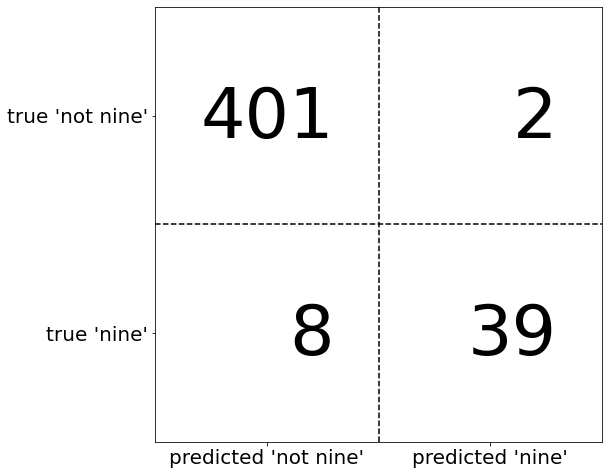

In [80]:
mglearn.plots.plot_confusion_matrix_illustration()

Матрица ошибок для классификационной задачи  
«девятка против остальных» 

Элементы  главной  диагонали матрицы  ошибок  соответствуют 
правильным  прогнозам  (результатам  классификации),  тогда  как  
остальные  элементы  показывают,  сколько  примеров,  относящихся  к 
одному классу, были ошибочно классифицированы как другой класс. 
Объявив «девятку» положительным классом, мы можем рассмотреть 
элементы  матрицы  ошибок  в  терминах  ложно  положительных  (false 
positive) и ложно отрицательных (false negative) примеров, которые мы 
ввели  ранее.  Для  полноты  картины  мы  назовем    правильно 
классифицированные  положительные  примеры  истинно 
положительными  (true  positive),  а  правильно  классифицированные 
отрицательные примеры – истинно отрицательными (true negative). Эти 
термины, как правило, записывают в сокращенном виде как FP, FN, TP 
и TN и приводят к следующей интерпретации матрицы  ошибок рис.:

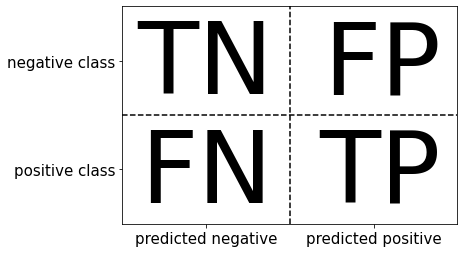

In [81]:
mglearn.plots.plot_binary_confusion_matrix()

Теперь давайте воспользуемся матрицей ошибок для сравнения ранее 
построенных  моделей  (две  дамми-модели,  дерево  решений,  а  также 
логистическая регрессия): 

In [84]:
print("Наиболее часто встречающийся класс:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nДамми-модель:")
print(confusion_matrix(y_test, pred_dummy))
print("\nДерево решений:")
print(confusion_matrix(y_test, pred_tree))
print("\nЛогистическая регрессия")
print(confusion_matrix(y_test, pred_logreg))

Наиболее часто встречающийся класс:
[[403   0]
 [ 47   0]]

Дамми-модель:
[[403   0]
 [ 47   0]]

Дерево решений:
[[390  13]
 [ 24  23]]

Логистическая регрессия
[[402   1]
 [  6  41]]


Взглянув  на  матрицу  ошибок,  становится  совершенно  ясно,  что  с 
моделью  pred_most_frequent  что-то  не  так,  потому  что  она  всегда 
предсказывает один и тот же класс. С другой стороны, модель pred_dummy 
характеризуется очень маленьким количеством истинно положительных 
примеров  (4)  по  сравнению  с  остальными  примерами,  при  этом 
количество  ложно  положительных  примеров  существенно  больше 
количества истинно положительных примеров! Прогнозы, полученные с 
помощью дерева решений, несут гораздо больше смысла, чем прогнозы 
дамми-модели, хотя правильность у этих моделей почти одинаковая. И, 
наконец,  мы  видим,  что  прогнозы  логистической  регрессии  лучше 
прогнозов  pred_tree  во  всех  аспектах:  она  имеет  большее  количество 
истинно положительных и истинно отрицательных примеров, в то время 
количество  ложно  положительных  и  ложно  отрицательных  примеров 
стало  меньше.  Из  этого  сравнения  ясно,  что  лишь  дерево  решений  и 
логистическая  регрессия  дают  разумные  результаты,  при  этом 
логистическая  регрессия  работает  лучше  дерева  во  всех  отношениях. 
Однако интерпретация матрицы ошибок немного громоздка и хотя мы 
получили массу информации, анализируя все аспекты матрицы, процесс 
работы с матрицей ошибок был трудоемким и сложным. Есть несколько 
способов обобщить информацию, содержащуюся в матрице ошибок.

###### Связь с правильностью
Мы уже знакомы с одним из способов обобщить результаты матрицы –
вычислением правильности, которую можно выразить в виде следующей 
формулы: 
\begin{equation}
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
\end{equation}

Другими  словами,  правильность  –  это  количество  верно 
классифицированных  примеров  (TP  и  TN),  поделенное  на  общее 
количество примеров (суммируем все элементы матрицы ошибок). 

##### Точность, полнота и F-мера

Есть  еще  несколько  способов  подытожить  информацию  матрицы 
ошибок,  наиболее  часто  используемыми  из  них  являются  точность  и 
полнота.  Точность  (precision)  показывает,  сколько  из  предсказанных 
положительных  примеров  оказались  действительно  положительными. 
Таким образом, точность – это доля истинно положительных примеров 
от общего количества предсказанных положительных примеров. 

\begin{equation}
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

Точность используется в качестве показателя качества модели, когда 
цель  состоит  в  том,  чтобы  снизить количество  ложно  положительных 
примеров.  В  качестве  примера  представьте  модель,  которая  дожна 
спрогнозировать, будет ли эффективен новый лекарственный препарат 
при лечении болезни. Клинические испытания, как известно, дороги, и 
фармацевтическая компания хочет провести их лишь в том случае, когда 
полностью  убедится,  что  препарат  действительно  работает.  Поэтому 
важно  минимизировать  количество  ложно  положительных  примеров, 
другими  словами,  необходимо  увеличить  точность.  Точность  также 
известна  как  прогностическая  ценность  положительного  результата 
(positive predictive value, PPV). 
С  другой  стороны,  полнота  (recall)  показывает,  сколько  от  общего 
числа  фактических  положительных  примеров  было  предсказано  как 
положительный  класс.  Полнота  –  это  доля  истинно  положительных 
примеров от общего количества фактических положительных примеров.

\begin{equation}
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

Полнота используется в качестве показателя качества модели, когда 
нам необходимо определить все положительные примеры, то есть, когда 
важно  снизить  количество  ложно  отрицательных  примеров.  Пример 
диагностики рака, приведенный ранее, является хорошей 
иллюстрацией подобной задачи: важно выявить всех больных пациентов, 
при этом, возможно, включив в их число здоровых пациентов. Другие 
названия  полноты  –  чувствительность  (sensitivity),  процент 
результативный  ответов  или  хит-рейт  (hit  rate)  и  доля  истинно 
положительных примеров (true positive rate, TPR).
Всегда необходимо найти компромисс между оптимизацией полноты 
и  оптимизацией  точности.  Вы  легко  можете  получить  идеальную 
полноту,  спрогнозировав  все  примеры  как  положительные  –  не  будет 
никаких  ложно  отрицательных  и  истинно  отрицательных  примеров. 
Однако прогнозирование всех примеров как положительных приведет к 
большому  количеству  ложно  положительных  примеров,  и, 
следовательно,  точность  будет  очень  низкой.  

Пример Confusion matrix?

Хотя точность и полнота являются очень важными метриками, сами 
по  себе  они  не  дадут  вам  полной  картины.  Одним  из  способов 
подытожить их является F-мера (F-measure), которая представляет собой 
гармоническое среднее точности и полноты: 

\begin{equation}
\text{F} = 2 \cdot \frac{\text{precision} \cdot \text{recall}}{\text{precision} + \text{recall}}
\end{equation}

Этот вариант вычисления F-меры еще известен как f1-мера. Поскольку 
f1-мера учитывает точность и полноту, то для бинарной классификации 
несбалансированных  данных она может быть более  лучшей метрикой, 
чем правильность. Давайте применим ее к прогнозам для нашего набора 
данных «девятка против остальных», полученным нами ранее. В данном 
случае мы будем считать класс «девятка» положительным классом (он 
получает метку True, тогда как класс «не-девятка» получает метку False), 
таким образом, положительный класс является миноритарным классом: 

In [85]:
from sklearn.metrics import f1_score
print("f1-мера наибольшая частота: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("f1-мера дамми: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1-мера дерево: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1-мера логистическая регрессия: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

f1-мера наибольшая частота: 0.00
f1-мера дамми: 0.00
f1-мера дерево: 0.55
f1-мера логистическая регрессия: 0.92



Здесь  мы  можем  отметить  два  момента.  Во-первых,  мы  получаем 
сообщение об ошибке для прогнозов модели most_frequent, поскольку не 
было  получено  ни  одного  прогноза  положительного  класса  (таким 
образом, знаменатель в формуле расчета f-меры равен нулю). Кроме того, 
мы можем увидеть довольно сильное различие между прогнозами дамми-
модели и прогнозами дерева, которое не так явно бросается в глаза, когда 
мы анализируем только правильность. Использовав f-меру для оценки 
качества,  мы  снова  подытоживаем  прогностическую  способность  с 
помощью одного числа. Однако, похоже, что f-мера действительно дает 
более  лучшее  представление  о  качестве  модели,  чем  правильность. 
Вместе  с  тем  недостаток  f-меры  заключается  в  том,  что  в  отличие  от 
правильности ее труднее интерпретировать и объяснить. 
Если  мы  хотим  получить  более  развернутый  отчет  о  точности, 
полноте  и  f1-мере,  можно  воспользоваться  удобной  функцией 
classification_report,  чтобы  вычислить  все  три  метрики  сразу  и 
распечатать их в привлекательном виде: 

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



Функция classification_report печатает отчет, в котором выводятся 
показатели  точности,  полноты  и  f-меры  для  отрицательного  и 
положительного  классов.  Миноритарный  класс  «девятка»  считается 
положительным  классом.  Значение  f-меры  для  него  равно  0.  Для 
мажоритарного класса «не-девятка» значение f-меры равно 0.94. Кроме 
того,  полнота  для  класса  «не-девятка»  равна  1,  поскольку  мы 
классифицировали  все  примеры  как  «не-девятки».  Крайний  правый 
столбец  –  это  поддержка  (support),  которая  равна  фактическому 
количеству примеров данного класса. 
В  последней  строке  отчета  приводятся  средние  значения  метрик, 
взвешенные  по  количеству  фактических  примеров  в  каждом  классе. 
Поясним  процесс  вычисления  взвешенного  среднего  значения  на 
примере  f-метрики.  Сначала  вычисляем  веса  отрицательного  и 
положительного классов. Вес отрицательного класса равен 403/450=0.90. 
Вес  положительного  класса  равен  47/450=0.10.  Теперь 
спрогнозированное значение f-меры для каждого класса умножаем на вес 
соответствующего  класса,  складываем  результаты  и  получаем 
взвешенное среднее значение f-меры: 0.90 x 0.94 + 0.10 x 0.00 = 0.85. Ниже 
даны  еще  два  отчета  –  для  дамми-классификатора  и  логистической 
регрессии: 

In [87]:
print(classification_report(y_test, pred_dummy,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [88]:
print(classification_report(y_test, pred_logreg,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



Взглянув  на  отчеты,  можно  заметить,  что  различия  между  дамми-
моделью  и  моделью  логистической  регрессии  уже  не  столь  очевидны. 
Решение о том, какой класс объявить положительным, имеет большое 
влияние на метрики. Несмотря на то, что в дамми-классификаторе f-мера 
для класса «девятка» равна 0.13 (в сравнении с 0.89 для логистической 
регрессии), а для класса «не-девятка» она равна 0.90 (в сравнении с 0.99 
для логистической регрессии), похоже, что обе модели дают разумные 
результаты.  Однако  проанализировав  все  показатели  вместе,  можно составить  довольно  точную  картину  и  четко  увидеть  превосходство 
модели логистической регрессии. 

##### Принимаем во внимание неопределенность

Матрица  ошибок  и  отчет  о  результатах  классификации  позволяют 
провести очень детальный анализ полученных прогнозов. Однако сами 
по  себе  прогнозы  лишены  большого  объема  информации,  которая 
собрана  моделью.  Как  мы  уже  говорили ранее,  большинство 
классификаторов  для  оценки  степени  достоверности  прогнозов 
позволяют использовать методы decision_function или predict_proba. 
Получить  прогнозы  можно,  установив  для  decision_function  или 
predict_proba пороговое значение в некоторой фиксированной точке – в 
случае  бинарной  классификации  мы  используем  0  для  решающей 
функции и 0.5 для метода predict_proba. 
Ниже  приведен  пример  несбалансированной  бинарной 
классификации: 400 точек данных в отрицательном классе и 50 точек 
данных в положительном классе. Обучающие данные показаны на рис.  слева. Мы обучаем модель ядерного SVM на этих данных, а также 
выводим справа графики обучающих данных, показывающие значения 
решающей функции в виде теплокарты. В самом центре графика можно 
увидеть  черную  окружность,  который  соответствует  пороговому 
значению  decision_function,  равному  нулю.  Точки  внутри  этой 
окружности  будут  классифицироваться  как  положительный  класс,  а 
точки вне окружности будут отнесены к отрицательному классу: 

In [89]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

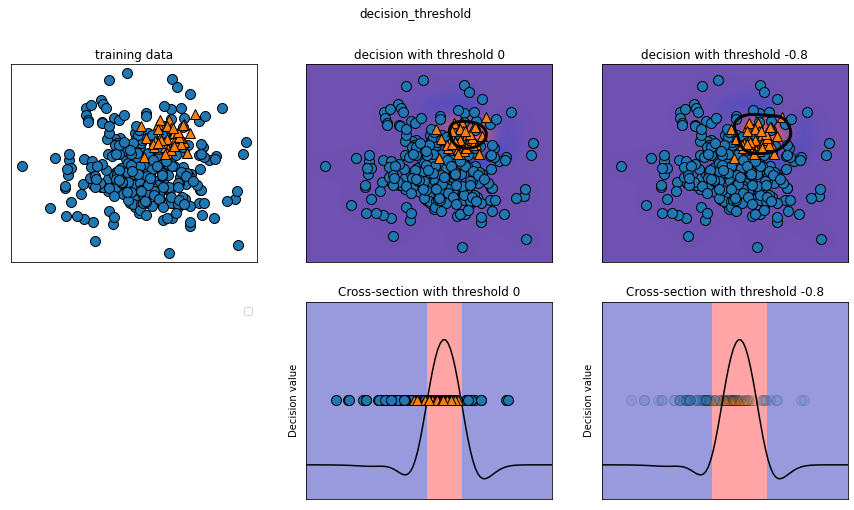

In [90]:
mglearn.plots.plot_decision_threshold()

In [92]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [97]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [98]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



##### Precision-Recall curves and ROC curves

In [99]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

0.6694214876033058
0.6428571428571429


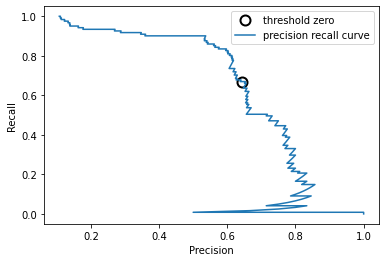

In [104]:
# Use more data points for a smoother curve
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
print(recall[close_zero])
print(precision[close_zero])
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

- precision_recall_curve - вычислите пары точность-отзыв для различных порогов вероятности.

- Примечание: эта реализация ограничена задачей бинарной классификации.

zero TH -это нулевой порог (центр нашего разбиения)

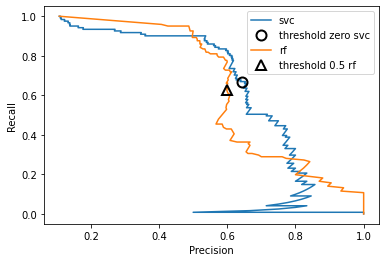

In [101]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [63]:
print("f1_score of random forest: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [64]:
from sklearn.metrics import average_precision_score #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.average_precision_score.html
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


##### Receiver Operating Characteristics (ROC) and AUC
\begin{equation}
\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}
\end{equation}

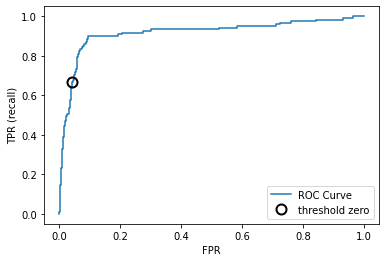

In [140]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

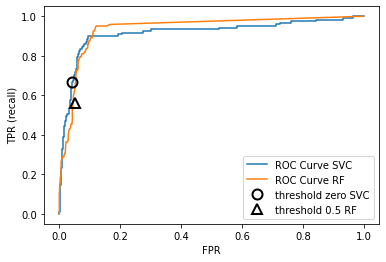

In [141]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

In [142]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


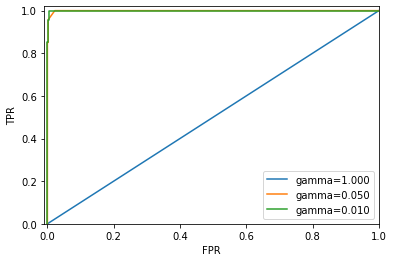

In [143]:
from sklearn.metrics import roc_auc_score
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
          gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

#### Metrics for Multiclass Classification

In [144]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


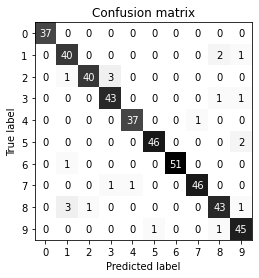

In [145]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [146]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [147]:
print("Micro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.951
Macro average f1 score: 0.952


#### Regression metrics

### Using evaluation metrics in model selection

In [148]:
# default scoring for classification is accuracy
print("Default scoring: {}".format(
    cross_val_score(SVC(), digits.data, digits.target == 9, cv=5)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy", cv=5)
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="roc_auc", cv=5)
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [149]:
res = cross_validate(SVC(), digits.data, digits.target == 9,
                     scoring=["accuracy", "roc_auc", "recall_macro"],
                     return_train_score=True, cv=5)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.015000,0.013002,0.975000,0.994433,0.997171,0.998679,0.887346,0.972222
1,0.013969,0.013025,0.991667,0.995825,0.998543,0.999141,0.958333,0.982252
2,0.014970,0.013032,1.000000,0.995132,1.000000,0.998975,1.000000,0.978780
3,0.014998,0.013001,0.994429,0.995828,0.999828,0.998825,0.972222,0.982252
4,0.015001,0.021000,0.980501,0.996523,0.984004,0.999914,0.902778,0.985725


In [150]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [151]:
# using AUC scoring instead:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000


In [153]:
from sklearn.metrics import SCORERS
print("Available scorers:")
print(sorted(SCORERS.keys()))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v

### Summary and Outlook